In [1]:
from astropy.io import ascii  #imports ascii

data = ascii.read("data.v3.txt") #reads in the data
print(data) #prints read data

 x      y     dy 
---- ------- ----
 0.0 49.1893 30.0
 1.0 54.8448 30.0
 2.0 40.1114 30.0
 3.0 26.1809 30.0
 4.0 40.7383 30.0
 5.0 71.9467 30.0
 6.0 33.5833 30.0
 7.0 131.364 30.0
 8.0  68.197 30.0
 9.0 131.095 30.0
 ...     ...  ...
30.0 197.244 30.0
31.0 291.271 30.0
32.0 261.346 30.0
33.0 240.729 30.0
34.0 211.113 30.0
35.0 223.606 30.0
36.0 258.455 30.0
37.0 226.111 30.0
38.0 276.129 30.0
39.0 238.149 30.0
Length = 40 rows


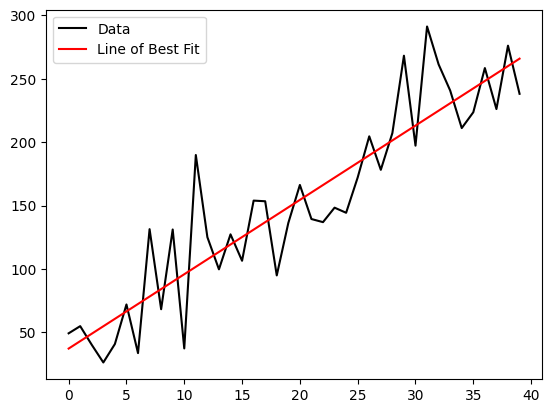

In [2]:
import numpy as np #imports necessary libraries
import matplotlib.pyplot as plt
from astropy.modeling import models, fitting

x = data['x']  # sets x values
y = data['y']  # sets y values

fit = fitting.LinearLSQFitter() #initializes a linear fitter
line_init = models.Linear1D() #initializes a linear model
fitted_line = fit(line_init, x, y) #fits the data with the fitter

plt.plot(x, y, '-k', label='Data') #plot data
plt.plot(fitted_line(x), '-r', label='Line of Best Fit') #plots line of best fit
plt.legend()

<ErrorbarContainer object of 3 artists>

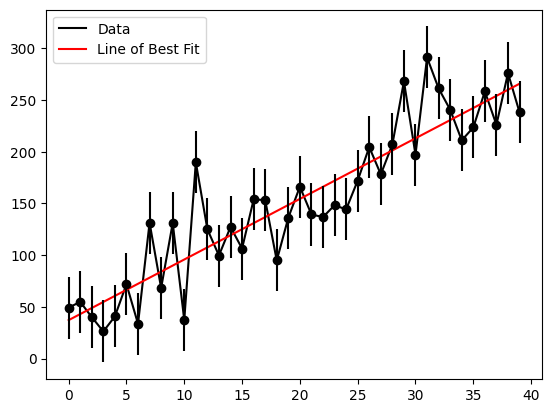

In [3]:
plt.plot(x, y, '-k', label='Data') #plot data
plt.plot(fitted_line(x), '-r', label='Line of Best Fit') #plots line of best fit
plt.legend()
plt.errorbar(x, y, yerr=30, fmt='ko') #plots the error bars with a dot at the point

In [4]:
def fit_line(x, y, dy):
    fit = fitting.LinearLSQFitter() #initializes a linear fitter
    line_init = models.Linear1D() #initializes a linear model
    fitted_line = fit(line_init, x, y) #fits the data with the fitter
    plt.plot(x, y, '-k', label = 'Data') #plots x and y
    plt.plot(fitted_line(x), '-r', label='Line of Best Fit') #plots line of best fit
    plt.legend() #plots legend
    plt.errorbar(x, y, yerr = dy, fmt='ko') #plots error bars

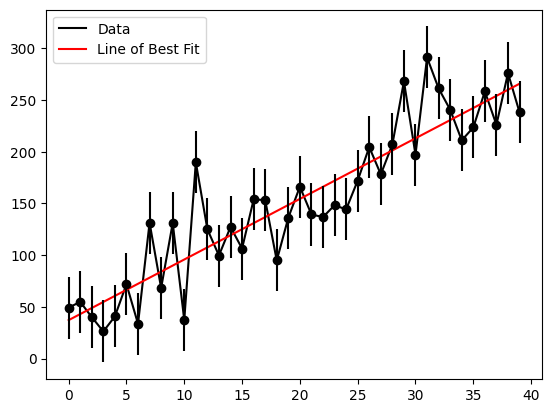

In [5]:
fit_line(data['x'], data['y'], 30)

The first issue I have with graph is how it appears that there is an inequal distribution of points above and below the line of best fit. The points above the line are fewer in number, but farther away from the line of best fit, meaning that they are pushing the average higher. Therefore, this data is not particularily well-represented, especially when it comes to the points lower than the line. One additional, smaller issue I have with this graph is how the error bars make it so hard to read the data. I also believe that the dots representing this plot should be smaller. Right now the entire graph feels very cluttered and awkward to read.

 x      y     dy 
---- ------- ----
 0.0 49.1893 30.0
 1.0 54.8448 30.0
 2.0 40.1114 30.0
 3.0 26.1809 30.0
 4.0 40.7383 30.0
 5.0 71.9467 30.0
 6.0 33.5833 30.0
 7.0 131.364 30.0
 8.0  68.197 30.0
 9.0 131.095 30.0
 ...     ...  ...
30.0 197.244 30.0
31.0 291.271 30.0
32.0 261.346 30.0
33.0 240.729 30.0
34.0 211.113 30.0
35.0 223.606 30.0
36.0 258.455 30.0
37.0 226.111 30.0
38.0 276.129 30.0
39.0 238.149 30.0
Length = 40 rows


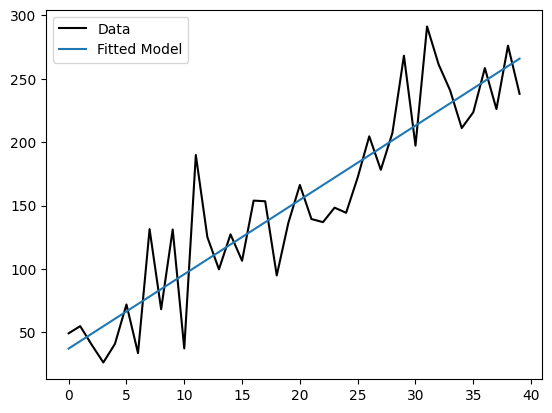

In [21]:
from astropy.table import Table #imports Table from astropy
from astropy.modeling import models, fitting #imports models for line fitting

t = Table(data) #initializes the astropy table
print(t) #prints table

fit = fitting.LinearLSQFitter() #initializes fitted line
line_init = models.Linear1D() 
fitted_line = fit(line_init, x, y) #sets fitted line to x and y

plt.plot(t['x'], t['y'], '-k', label="Data") #plots data
plt.plot(fitted_line(x), label="Fitted Model") #plots line of best fit
plt.legend()